# Analysis

In [29]:
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import seaborn as sns

In [30]:
os.chdir('../data')
DATA_DIR = os.getcwd()

In [31]:
df_x = pd.read_csv(DATA_DIR + '/raw/train_values.csv')
df_y = pd.read_csv(DATA_DIR + '/raw/train_labels.csv')
df_x_test = pd.read_csv(DATA_DIR + '/raw/test_values.csv')

## Convert data to proper dtypes

In [32]:
bool_cols = ['sex', 'fasting_blood_sugar_gt_120_mg_per_dl', 'exercise_induced_angina']
float_cols = ['oldpeak_eq_st_depression']
categorical_cols = ['thal']
int_cols = ['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'age', 'max_heart_rate_achieved']

In [33]:
df_x[bool_cols].astype(bool)
df_x[float_cols].astype(float)
df_x[categorical_cols].astype('category')
df_x[int_cols].astype(int)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


## Scale numerical data with MaxAbsScaler() 

In [25]:
max_abs_scaler = MaxAbsScaler()
df_x[[*int_cols, *float_cols]] = max_abs_scaler.fit_transform(df_x[[*int_cols, *float_cols]])
df_x_test[[*int_cols, *float_cols]] = max_abs_scaler.transform(df_x_test[[*int_cols, *float_cols]])



## One-hot encode categorical data

In [ ]:
label_encoder = LabelEncoder()
one_hot = OneHotEncoder()
df_x[categorical_cols] = 

In [27]:
min_max_scaler = MinMaxScaler()
df_x[[*int_cols, *float_cols]] = min_max_scaler.fit_transform(df_x[[*int_cols, *float_cols]])

In [36]:
serum_log10 = np.log10(df_x['serum_cholesterol_mg_per_dl'])
df_serum_log10 = pd.DataFrame(serum_log10)


In [37]:
min_max_scaler = MinMaxScaler()
minmax_serum = min_max_scaler.fit_transform(df_serum_log10)
max_abs_scaler = MaxAbsScaler()
maxabs_serum = max_abs_scaler.fit_transform(df_serum_log10)

In [38]:
df_minmax = pd.DataFrame(minmax_serum)
df_maxabs = pd.DataFrame(maxabs_serum)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe170267b8>]],
      dtype=object)

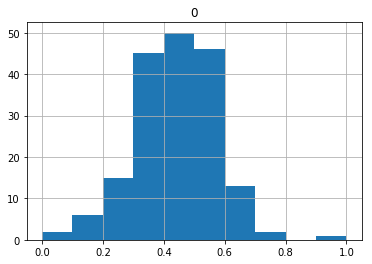

In [41]:
df_minmax.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe16362ba8>]],
      dtype=object)

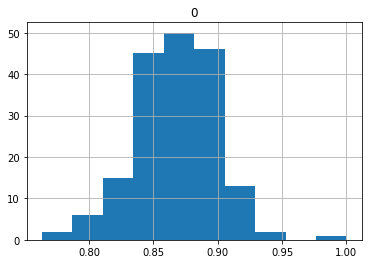

In [42]:
df_maxabs.hist()

In [53]:
scaler = MinMaxScaler()
arr = df_x['serum_cholesterol_mg_per_dl'].values
arr = np.reshape(arr, (-1, 1))
serum = scaler.fit_transform(arr)

/home/alexb/miniconda3/envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe13a5d1d0>]],
      dtype=object)

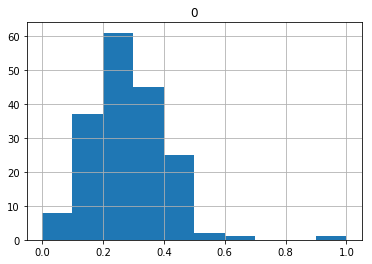

In [55]:
df = pd.DataFrame(serum)
df.hist()